# Introduction to Probability and Statistics
> A summary of "Probability and Statistics in Data Science using Python", offered from UCSD

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, edX, Data_Science, Statistics, Probability]
- image: 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Why Probability and Statistics

- Why should you care about prob&stat?
  - Navigation software:
    - Certainty: Find the **shortest** route from a to b
    - Uncertainty: Find the **fastest** route from a to b
  
  - Search engine:
    - Certainty: Find **all** web pages that contain the words "Trump", "Hillary", and "debate"
    - Uncertainty: Find the 10 **most relevant** pages for the query "Trump, Hillary debate"

  - Insurance Company:
    - Certainty: If a person with life insurance dies, the insurance company has to pay the family \$X
    - Uncertainty: What is the minimal life insurance premium such that **the probability that** the life insurance company will be bankrupt in 10 years is smaller that 1%?

## Probability Theory
### What is Probability Theory?
- Probability Theory is **mathematical framework** for computing the probability of complex events
- Under the assumption that **we know the probabilities of the basic events**

#### A simple question
We all know that if one flips a fair coin then the outcome is "heads" or "tails with equal probabilities. What does that mean?

 It means that if we flip the coin $k$ times, for some large value of $k$, say $k = 10000$. Then the number of "heads" is about $\frac{k}{2} = \frac{10000}{2} = 5000$
 
#### Simulating coin flips
We will use the pseudo random number generators in `numpy` to simulate the coin flips. Instead of "Heads" and "Tails", we will use $x_i = 1$ or $x_i = -1$ and consider the sum $S_{10000} = x_1 + x_2 + \dots + x_{10000}$. And we will vary the number of coin flips, which we denote by $k$.

In [8]:
# Generate the sum of k coin flips, repeat that n times
def generate_counts(k=1000, n=100):
    # Generate a k X n matrix of $\pm$ 1 random numbers
    X = 2 * (np.random.rand(k, n) > 0.5) - 1
    S = np.sum(X, axis=0)
    return S

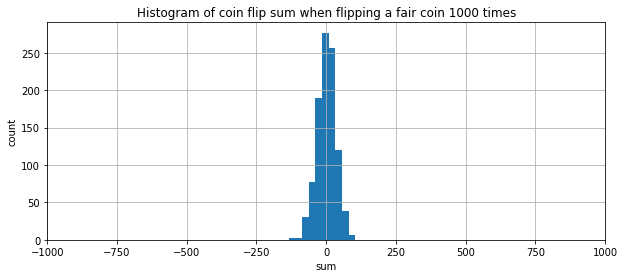

In [9]:
k = 1000
n = 1000
counts = generate_counts(k=k, n=n)
plt.figure(figsize=[10, 4]);
plt.hist(counts);
plt.xlim([-k, k]);
plt.xlabel("sum");
plt.ylabel('count');
plt.title('Histogram of coin flip sum when flipping a fair coin %d times' % k);
plt.grid();

Note that the sum $S_{1000}$ is not **exactly** 0, it is only **close to** 0.

Using **probability theory**, we can calculate how small is $\vert S_k \vert$.

In later lesson, we will show that the probability that 

$$ \vert S_k \vert \ge 4 \sqrt{k} $$

is smaller than $2 \times 10^{-8}$ which is $0.000002\%$

At first, let's use our simulation to demonstrate that this is the case:

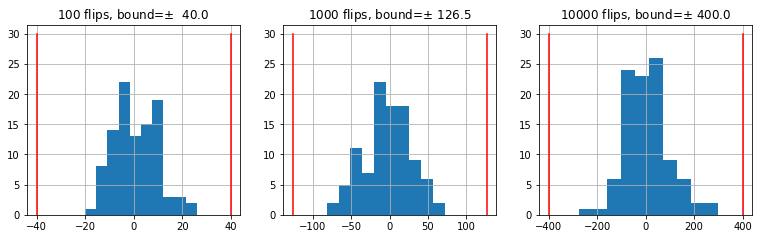

In [12]:
from math import sqrt
plt.figure(figsize=[13, 3.5]);

for j in range(2, 5):
    k = 10 ** j
    counts = generate_counts(k=k, n=100)
    plt.subplot(130 + j - 1);
    plt.hist(counts, bins=10);
    d = 4 * sqrt(k)
    plt.plot([-d, -d], [0, 30], 'r');
    plt.plot([+d, +d], [0, 30], 'r');
    plt.grid();
    plt.title('%d flips, bound=$\pm$%6.1f' % (k, d));

If we scale, if we plot the full scale of these coin flips,

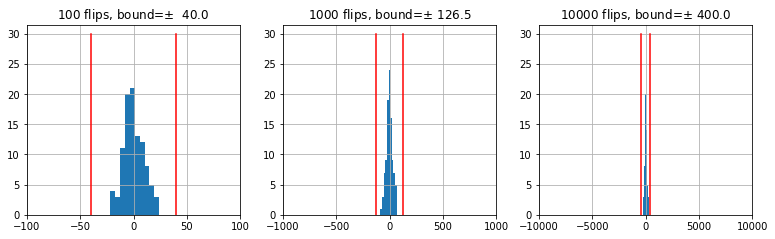

In [13]:
plt.figure(figsize=[13, 3.5]);

for j in range(2, 5):
    k = 10 ** j
    counts = generate_counts(k=k, n=100)
    plt.subplot(130 + j - 1);
    plt.hist(counts, bins=10);
    plt.xlim([-k, k]);
    d = 4 * sqrt(k)
    plt.plot([-d, -d], [0, 30], 'r');
    plt.plot([+d, +d], [0, 30], 'r');
    plt.grid();
    plt.title('%d flips, bound=$\pm$%6.1f' % (k, d));

#### Summary
We did some experiments summing $k$ random numbers:

$$ S_k = x_1 + x_2 + \dots + x_k $$

$x_i = -1$ with probability $\frac{1}{2}$, $x_i = +1$ with probability $\frac{1}{2}$

Out experiments show that the sum $S_k$ is (almost) always in the range $[-4\sqrt{k}, +4\sqrt{k}]$,

$$ \text{If } k \rightarrow \infty, \frac{4 \sqrt{k}}{k} = \frac{4}{\sqrt{k}} \rightarrow 0 $$

Therefore,

$$ \text{If } k \rightarrow \infty, \frac{S_k}{k} \rightarrow 0 $$

### What is probability theory (again)
It is the math involved in **proving** (a precise of) the statements above.

In most cases, we can **approximate** probabilities using simulations (Monte-Carlo simulations)

Calculating the probabilites is better because:
- It provides a precise answer
- It is much faster than Monte Carlo simulations

## Statistics

### What is statistics?
Probability theory computes probabilities of complex events given the underlying base probabilties

Statistics takes us in the opposite direction
We are given data that was generated by a **Stochastic process** 
We infer properties of the underlying base probabilities.

### Example - Deciding whether a coin is biased
We discussed the distribution of the number of heads when flipping a fair coin many times. Let's turn the question around: we flip a coin 1000 times and get 570 heads.
 Can we conclude that the coin is biased (not fair)? What can we conclude if we got 507 heads?
 
#### The logic of Statistical Inference
The answer uses the following logic

- Suppose that the coin is fair
- Use **probability theory** to compute the probability of getting at least 570 (or 507) heads.
- If this probability is very small, then we can **reject with confidence**  the hypothesis that the coin is fair

#### Calculating the answer
Recall the coin flip example used previous section.

We used $x_i = -1$ for tails and $x_i = +1$ for heads.

We looked at the sum $S_k = \sum_{i=1}^{k} x_i$, here $k=1000$.

If the number of heads is 570, then $S_{1000} = 570 - 430 = 140$.

This result is very unlikely that $\vert S_{1000} \vert \gt 4 \sqrt{k} \approx 126.5 $. And it is very unlikely that the coin is unbiased.

#### What about 507 heads?
507 heads = 493 tails $\Rightarrow S_n = 14, 14 \ll 126.5$

So we cannot conclude that coin is biased.

### Conclusion
The probability that an unbiased coin would generate a sequence with 570 or more heads is extremely small. From which we can conclude, **with high confidence**, that the coin is biased.

On the other hand, $\vert S_{1000} \vert \gt 14$ is quite likely. So getting 507 heads does not provide evidence that the coin is biased.

### Real-World examples
You might ask "why should I care whether a coin is biased?"
- This is a valid critique.
- We will give a few real-world cases in which we want to know whether a "coin" is biased or not.

#### Case 1 - Polls
- Suppose elections will take place in a few days and we want to know how people plan to vote
- Suppose there are just two parties: **D** and **R**
- We could try and ask all potential voters $\rightarrow$ that would be very expensive
- Instead, we can use a poll: call up a small randomly selected set of people
- Call $n$ people at random and count the number of **D** votes.
- Can you say **with confidence** that there are more **D** votes, or more **R** votes?
- Mathmatically equivalent to flipping a biased coin and
- Asking whether you can say **with confidence** that it is biased towards "Heads" or towards "Tails"

#### Case 2 - A/B testing
A common practice when optimizing a web page is to perform A/B tests.
- A/B refers to two alternative design fot the page.
![ab](image/ab_test.png)
- To see which design users prefer we randomly present design A or design B
- We measure how long the user stayed on a page, or whether the user clicked on an advertisement.
- We want to decide,**with confidence**, which of the two designs is better.
- Again: similar to making a decision **with confidence** on whether "Heads" is more probably than "Tails" or vice versa.

### Summary
Statistics is about analyzing real-world data and drawing conclusions
Examples includes:

- Using polls to estimate public opinion
- Performing A/B tests to design web pages
- Estimating the rate of global warming
- Deciding whether a medical procedure is effective

## A 3-card puzzle
Suppose we have three cards in a hat:

- **RB** : One card is painted blue on one side and red on the other.
- **BB** : One card is painted blue on both sides.
- **RR** : One card is painted red on both sides.

### The setup
- I pick one of the three cards at randomn, flip it to a random side, and place it on the table.
- $U$ be the color of the side of the card facing up. ("**B**", or "**R**")

### Do you want to bet?
- If the other side of the card has a different, I pay you \$1,
- If the other side has the same color, you pay me \$1.

### Why is this a fair bet?
- Suppose $U$ us **R**.
- Then, the card is either **RR** or **RB**.
- Therefore, the other side can be either **R** or **B**.
- Therefore, in this case, the odds are equal.
- A similar argument holds for the case where $U$ is **B**

### Let's use a monte-carlo simulation

In [19]:
from random import random

red_bck="\x1b[41m%s\x1b[0m"
blue_bck="\x1b[44m%s\x1b[0m"
red=red_bck%'R'
black=blue_bck%'B'
Cards=[(red,black),(red,red),(black,black)]
counts={'same':0,'different':0}

for j in range(50):
    # Select a random card
    i = int(random() * 3.)
    side = int(random() * 2.)
    C = Cards[i]
    
    # Select which side to be "up"
    if side == 1:
        C = (C[1], C[0])
    same = 'same' if C[0] == C[1] else 'different'
    
    # Count the number of times the two sides are the same or different.
    counts[same] += 1
    print(''.join(C) + ' %-9s' % same, end='')
    if(j + 1) % 5 == 0:
        print()
        
print()
print(counts)

BR differentRB differentRR same     BB same     BB same     
BB same     RB differentBB same     BB same     RR same     
RR same     BB same     RB differentBB same     RB different
RB differentRB differentBR differentRR same     BB same     
BB same     RB differentBR differentRB differentRB different
BR differentBB same     BB same     RB differentRR same     
BB same     BR differentBR differentRR same     BB same     
RR same     BR differentRR same     RB differentBB same     
RB differentRR same     BR differentBB same     BB same     
BR differentRR same     RR same     RB differentRR same     

{'same': 28, 'different': 22}


### The simulation does not agree with the argument
- In simulation: the two sides have the same color about **twice** the number of times that they have different color.

- You are twice as likely to lose as you are to win.

- On Average, you lose 33 cents per iteration:
$$ \$1 \times (2/3) - \$1 \times (1/3) $$

### Alternative argument
If we pick a card at random 2/3 of the time, we pick a card where the two sides have the same color, and only 1/3 where the color is different.

### How can we be sure?
- The original argument also sounds convincing, but is wrong.
- To be sure that our argument is correct, we need to define some concepts, including **outcome** and **event**.